<a href="https://colab.research.google.com/github/eildes06/Machine-Learning/blob/main/CNN_Project_Image_Classification_with_CNN_(catdogclassifier)_emine_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Data/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [5]:
my_data_dir =("/content/data")

In [6]:
os.listdir(my_data_dir) 

['validation', 'test', 'train']

In [7]:
test_path = my_data_dir + '/test/'
train_path = my_data_dir + '/train/'
val_path = my_data_dir + '/validation/'


In [8]:
os.listdir(test_path)

['3635.jpg',
 '4876.jpg',
 '5838.jpg',
 '5058.jpg',
 '12180.jpg',
 '3000.jpg',
 '5656.jpg',
 '4063.jpg',
 '4133.jpg',
 '11846.jpg',
 '11077.jpg',
 '4979.jpg',
 '3961.jpg',
 '5335.jpg',
 '6783.jpg',
 '10482.jpg',
 '10245.jpg',
 '5008.jpg',
 '6627.jpg',
 '6443.jpg',
 '11347.jpg',
 '11289.jpg',
 '4089.jpg',
 '12159.jpg',
 '3590.jpg',
 '5351.jpg',
 '5728.jpg',
 '3966.jpg',
 '10538.jpg',
 '12136.jpg',
 '10130.jpg',
 '11517.jpg',
 '4360.jpg',
 '3455.jpg',
 '5607.jpg',
 '4180.jpg',
 '4936.jpg',
 '6033.jpg',
 '6416.jpg',
 '10027.jpg',
 '3362.jpg',
 '5395.jpg',
 '10929.jpg',
 '4747.jpg',
 '6334.jpg',
 '10613.jpg',
 '6440.jpg',
 '6307.jpg',
 '7161.jpg',
 '12459.jpg',
 '6266.jpg',
 '12495.jpg',
 '5225.jpg',
 '3176.jpg',
 '5650.jpg',
 '3311.jpg',
 '5003.jpg',
 '11958.jpg',
 '4514.jpg',
 '12149.jpg',
 '6090.jpg',
 '12462.jpg',
 '4516.jpg',
 '3399.jpg',
 '3604.jpg',
 '3282.jpg',
 '6543.jpg',
 '4910.jpg',
 '4502.jpg',
 '10488.jpg',
 '11529.jpg',
 '4451.jpg',
 '6301.jpg',
 '5564.jpg',
 '4843.jpg',
 '1

In [9]:
os.listdir(train_path)

['dog', 'cat']

In [10]:
classes = os.listdir(train_path)
classes

['dog', 'cat']

In [11]:
import pathlib

data_dir = pathlib.Path(train_path) 
# turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
# created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


In [12]:
class_names

array(['cat', 'dog'], dtype='<U3')

**Let's check how many images there are.**

In [13]:
os.listdir(train_path+'cat')

['cat.9560.jpg',
 'cat.10959.jpg',
 'cat.2282.jpg',
 'cat.560.jpg',
 'cat.4056.jpg',
 'cat.931.jpg',
 'cat.6286.jpg',
 'cat.3424.jpg',
 'cat.3004.jpg',
 'cat.2751.jpg',
 'cat.4085.jpg',
 'cat.7323.jpg',
 'cat.8753.jpg',
 'cat.7022.jpg',
 'cat.5908.jpg',
 'cat.10917.jpg',
 'cat.8775.jpg',
 'cat.9438.jpg',
 'cat.658.jpg',
 'cat.5708.jpg',
 'cat.8801.jpg',
 'cat.4953.jpg',
 'cat.4676.jpg',
 'cat.12297.jpg',
 'cat.6441.jpg',
 'cat.761.jpg',
 'cat.2900.jpg',
 'cat.10328.jpg',
 'cat.12057.jpg',
 'cat.3514.jpg',
 'cat.10909.jpg',
 'cat.9777.jpg',
 'cat.9587.jpg',
 'cat.4904.jpg',
 'cat.9973.jpg',
 'cat.2570.jpg',
 'cat.7905.jpg',
 'cat.2780.jpg',
 'cat.7432.jpg',
 'cat.3161.jpg',
 'cat.7891.jpg',
 'cat.2491.jpg',
 'cat.3892.jpg',
 'cat.10440.jpg',
 'cat.10843.jpg',
 'cat.5229.jpg',
 'cat.11746.jpg',
 'cat.6958.jpg',
 'cat.783.jpg',
 'cat.683.jpg',
 'cat.8614.jpg',
 'cat.6082.jpg',
 'cat.9011.jpg',
 'cat.8213.jpg',
 'cat.11332.jpg',
 'cat.98.jpg',
 'cat.4303.jpg',
 'cat.229.jpg',
 'cat.6646.jp

In [14]:
os.listdir(train_path+'dog')

['dog.11695.jpg',
 'dog.10848.jpg',
 'dog.12336.jpg',
 'dog.12349.jpg',
 'dog.10031.jpg',
 'dog.2818.jpg',
 'dog.12097.jpg',
 'dog.1430.jpg',
 'dog.12124.jpg',
 'dog.2272.jpg',
 'dog.1298.jpg',
 'dog.1037.jpg',
 'dog.11138.jpg',
 'dog.10852.jpg',
 'dog.10398.jpg',
 'dog.1510.jpg',
 'dog.11887.jpg',
 'dog.10976.jpg',
 'dog.1844.jpg',
 'dog.10672.jpg',
 'dog.12269.jpg',
 'dog.2215.jpg',
 'dog.11320.jpg',
 'dog.11169.jpg',
 'dog.1294.jpg',
 'dog.297.jpg',
 'dog.2667.jpg',
 'dog.2887.jpg',
 'dog.11077.jpg',
 'dog.1709.jpg',
 'dog.1073.jpg',
 'dog.2268.jpg',
 'dog.10721.jpg',
 'dog.2335.jpg',
 'dog.1945.jpg',
 'dog.2044.jpg',
 'dog.1369.jpg',
 'dog.269.jpg',
 'dog.11543.jpg',
 'dog.1279.jpg',
 'dog.1140.jpg',
 'dog.181.jpg',
 'dog.10192.jpg',
 'dog.11739.jpg',
 'dog.11402.jpg',
 'dog.10868.jpg',
 'dog.2752.jpg',
 'dog.10412.jpg',
 'dog.11434.jpg',
 'dog.1243.jpg',
 'dog.168.jpg',
 'dog.2702.jpg',
 'dog.1897.jpg',
 'dog.10226.jpg',
 'dog.11523.jpg',
 'dog.11669.jpg',
 'dog.10912.jpg',
 'dog.

In [15]:
len(os.listdir(train_path+'cat')), len(os.listdir(train_path+'dog'))

(12500, 5026)

**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [16]:
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/data'.
There are 2 directories and 0 images in '/content/data/validation'.
There are 0 directories and 1071 images in '/content/data/validation/dog'.
There are 0 directories and 1219 images in '/content/data/validation/cat'.
There are 0 directories and 6897 images in '/content/data/test'.
There are 2 directories and 0 images in '/content/data/train'.
There are 0 directories and 5026 images in '/content/data/train/dog'.
There are 0 directories and 12500 images in '/content/data/train/cat'.


In [17]:
os.listdir(train_path+'cat')[:11]

['cat.9560.jpg',
 'cat.10959.jpg',
 'cat.2282.jpg',
 'cat.560.jpg',
 'cat.4056.jpg',
 'cat.931.jpg',
 'cat.6286.jpg',
 'cat.3424.jpg',
 'cat.3004.jpg',
 'cat.2751.jpg',
 'cat.4085.jpg']

In [18]:
os.listdir(train_path+'cat')[5]

'cat.931.jpg'

In [19]:
para_cell_pathc = train_path+'cat/'+'/cat.931.jpg'

In [20]:
para_cell_pathc

'/content/data/train/cat//cat.931.jpg'

In [21]:
catt=imread(para_cell_pathc)

In [22]:
para_cell= imread(para_cell_pathc)

In [23]:
os.listdir(train_path+'dog')[:11]

['dog.11695.jpg',
 'dog.10848.jpg',
 'dog.12336.jpg',
 'dog.12349.jpg',
 'dog.10031.jpg',
 'dog.2818.jpg',
 'dog.12097.jpg',
 'dog.1430.jpg',
 'dog.12124.jpg',
 'dog.2272.jpg',
 'dog.1298.jpg']

In [24]:
os.listdir(train_path+'dog')[5]

'dog.2818.jpg'

In [25]:
para_cell_pathd = train_path+'dog/'+'/dog.2818.jpg'

In [26]:
para_cell_pathd

'/content/data/train/dog//dog.2818.jpg'

In [27]:
dogg=imread(para_cell_pathd)

# Data Preprocessing

## Defining Input Shape

In [28]:
para_cell.shape

(499, 306, 3)

In [29]:
catt.shape

(499, 306, 3)

In [30]:
dogg.shape 


(316, 311, 3)

**Let's decide on the final dimension of these images.**

In [31]:
# View a random image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (309, 500, 3)


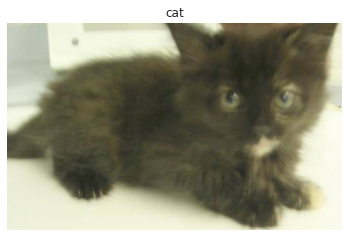

In [32]:
img = view_random_image(target_dir=train_path,
                        target_class="cat")

Image shape: (375, 499, 3)


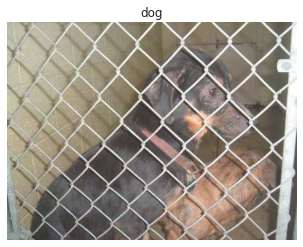

In [33]:
img = view_random_image(target_dir=train_path,
                        target_class="dog")

Image shape: (375, 499, 3)


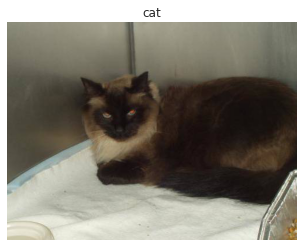

In [34]:
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names))

In [35]:
x = [imread(train_path+'cat/'+image).shape[0] for image in os.listdir(train_path+'cat')]
y = [imread(train_path+'cat/'+image).shape[1] for image in os.listdir(train_path+'cat')]

In [36]:
x[:5]

[375, 335, 456, 374, 375]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


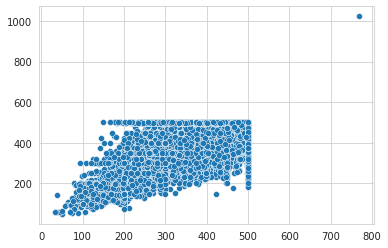

In [37]:
sns.scatterplot(x,y);

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [38]:
np.mean(x), np.median(x)

(356.46712, 374.0)

In [39]:
np.mean(y), np.median(y)

(410.52264, 470.0)

In [40]:
image_shape = (300,300,3) # burayi bir dusun 

In [41]:
catt.max()

255

In [42]:
dogg.max()

255

In [43]:
para_cell.max()

255

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

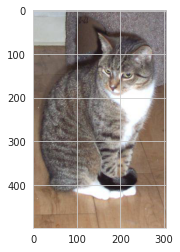

In [46]:
plt.imshow(para_cell);

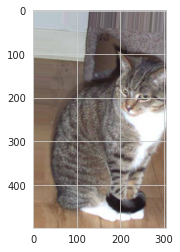

In [47]:
plt.imshow(image_gen.random_transform(para_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

val+test kullanilacak burda

In [48]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [49]:
image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


In [50]:
batch_size = 32

In [51]:
val_image_gen = image_gen.flow_from_directory(directory=val_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 2290 images belonging to 2 classes.


In [52]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [53]:
test_image_gen = image_gen.flow_from_directory(directory=test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 0 images belonging to 0 classes.


In [54]:
test_image_gen.class_indices

{}

# Modelling

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
model1 = Sequential()
#modell sequential
# hepsi standart gelcek hoca yapmisti
# 3 e 3 luk 32 filitre olcak
#32 kanalli image olcak
#padding yok
#

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# kanal sayisi 64 e cikardi 
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())
#flattendan  sonra hoca gebellikle 128 ile bitiriuyor


model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))


model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NameError: ignored

In [57]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [59]:
model1.fit(train_image_gen,
          epochs=10,
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=[early_stop])

Epoch 1/10
548/548 [==============================] - 405s 729ms/step - loss: 0.5906 - accuracy: 0.7193 - val_loss: 0.7147 - val_accuracy: 0.5349
Epoch 2/10
548/548 [==============================] - 394s 719ms/step - loss: 0.5455 - accuracy: 0.7292 - val_loss: 0.6890 - val_accuracy: 0.6066
Epoch 3/10
548/548 [==============================] - 393s 718ms/step - loss: 0.4816 - accuracy: 0.7768 - val_loss: 0.6523 - val_accuracy: 0.6878
Epoch 4/10
548/548 [==============================] - 388s 708ms/step - loss: 0.4506 - accuracy: 0.7937 - val_loss: 0.6101 - val_accuracy: 0.6934
Epoch 5/10
548/548 [==============================] - 387s 706ms/step - loss: 0.4303 - accuracy: 0.8053 - val_loss: 0.5375 - val_accuracy: 0.7284
Epoch 6/10
548/548 [==============================] - 390s 712ms/step - loss: 0.4068 - accuracy: 0.8188 - val_loss: 0.4893 - val_accuracy: 0.7725
Epoch 7/10
548/548 [==============================] - 387s 707ms/step - loss: 0.3962 - accuracy: 0.8270 - val_loss: 0.4935 -

In [60]:
#model1.fit(val_image_gen,
         # epochs=10,
         # steps_per_epoch=len(val_image_gen),
         # validation_data=test_image_gen,
          #validation_steps=len(test_image_gen),
          #callbacks=[early_stop])

In [2]:
model1.metrics_names

NameError: ignored

In [62]:
summary = pd.DataFrame(model1.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.591,0.719,0.715,0.535
1,0.546,0.729,0.689,0.607
2,0.482,0.777,0.652,0.688
3,0.451,0.794,0.610,0.693
4,0.430,0.805,0.537,0.728
5,0.407,0.819,0.489,0.772
6,0.396,0.827,0.494,0.772
7,0.387,0.834,0.456,0.797
8,0.376,0.837,0.522,0.759
9,0.363,0.842,0.555,0.749


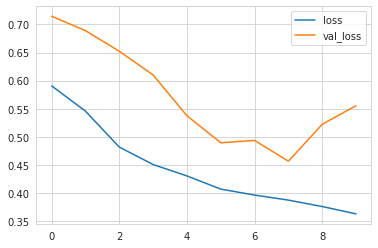

In [63]:
summary[["loss", "val_loss"]].plot();

In [1]:
summary[["accuracy", "val_accuracy"]].plot();

NameError: ignored

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
score = model1.evaluate(val_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
pred_prob = model1.predict(val_image_gen)

In [68]:
pred_prob

array([[0.5489689 ],
       [0.9554038 ],
       [0.01269479],
       ...,
       [0.05061103],
       [0.67948496],
       [0.26174313]], dtype=float32)

In [ ]:
y_pred = pred_prob > 0.5

In [ ]:
y_pred


In [ ]:
y_test = val_image_gen.classes
y_test

In [ ]:
print(classification_report(y_test, y_pred))

In [73]:
confusion_matrix(y_test, y_pred)

array([[764, 455],
       [693, 378]])

# Prediction

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>